In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

plt.style.use(["science","grid"])

In [2]:
# Import data of single runs 
data = pd.read_feather("sampling_base")
input_vars = pd.read_csv("input_parameters.csv")

# Import data of batch runs
data_batch1 = pd.read_feather("sampling_base_batch1")
input_vars_batch1 = pd.read_csv("input_parameters_batch1.csv")

data_batch2 = pd.read_feather("sampling_base_batch2")
input_vars_batch2 = pd.read_csv("input_parameters_batch2.csv")

data_batch3 = pd.read_feather("sampling_base_batch3")
input_vars_batch3 = pd.read_csv("input_parameters_batch3.csv")


data_batch2.o0 = data_batch2.o0+(len(input_vars_batch1))
data_batch3.o0 = data_batch3.o0+(len(input_vars_batch1)+len(input_vars_batch2))


data_batch = pd.concat([data_batch1,data_batch2,data_batch3]).reset_index()
input_vars_batch = pd.concat([input_vars_batch1,input_vars_batch2,input_vars_batch3]).reset_index()

# Supporting functions
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm

def ticks_labels(nb_days):
    if 30%nb_days != 0:
        raise ValueError 
    else:
        vec = np.linspace(0,4320,int(30/nb_days)+1)
        labs = list()
        for i in range(int(30/nb_days)+1):
            labs.append("Day %s"%(i*nb_days))
        return vec,labs

## Unsatisfied consumption

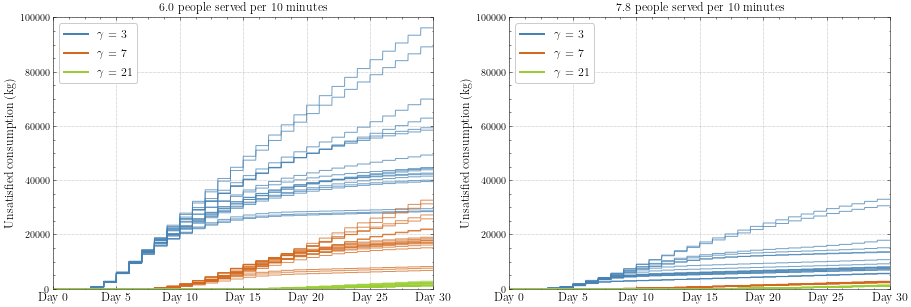

In [21]:
# dict to store relevant indices
d = {}
d[0] = input_vars[input_vars.gamma==3].index
d[1] = input_vars[input_vars.gamma==7].index
d[2] = input_vars[input_vars.gamma==14].index

fig, ax = plt.subplots(1,2,figsize=(15,5))
           
# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['steelblue','chocolate','yellowgreen']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = [r'$\gamma$ = 3', r'$\gamma$ = 7', r'$\gamma$ = 21']

for i in d:    
    for j in d[i]:
        if input_vars.parallel_served_full[j] == 6.0:
            ax[0].plot( x, data.o1[data.o0==j],color=colors[i], alpha=.75)
            ax[0].set_title("6.0 people served per 10 minutes")
        else:
            ax[1].plot( x, data.o1[data.o0==j],color=colors[i], alpha=.75)
            ax[1].set_title("7.8 people served per 10 minutes")
      
for a in ax:
    a.set_xticks(ticks_labels(5)[0])
    a.set_xticklabels(ticks_labels(5)[1],fontsize=12)
    a.set_xlim([0,4320])
    a.set_ylim([-200,100000])
    a.legend(lines, labels,loc='upper left',fontsize=12)
    a.set_ylabel("Unsatisfied consumption (kg)",fontsize=12)

plt.savefig("/home/daan/Desktop/uc_over_time.png")

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


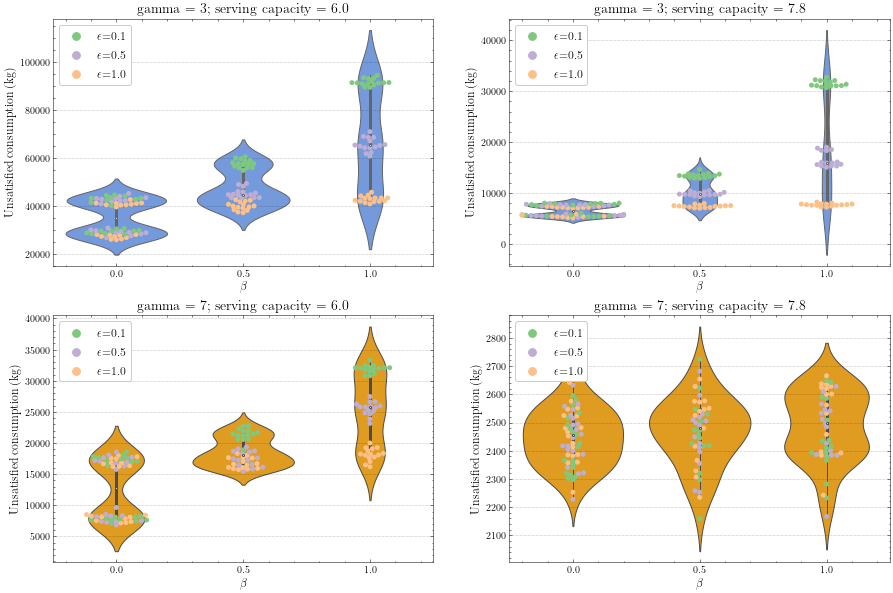

In [5]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

uc_endvals_dict = {}
uc_endvals_dict["unsatisfied consumption"] = list()
# filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()
for j in input_vars_batch.index:
    uc_endvals_dict["unsatisfied consumption"].append(data_batch.o1[data_batch.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([input_vars_batch,uc_endvals_df],axis=1)

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']
my_palette['reds'] = []

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp1[tmp1.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="unsatisfied consumption", data=tmp2,hue='epsilon',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][g])
        
        ax[g,s].set_title("gamma = %s; serving capacity = %s"%(gammas[g],scs[s]),fontsize=14)
                
        ax[g,s].set_ylabel("Unsatisfied consumption (kg)",fontsize=12)
        ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
        handles, labels = ax[g,s].get_legend_handles_labels()
        ax[g,s].legend(handles[:3], [r"$\epsilon$=0.1",r"$\epsilon$=0.5",r"$\epsilon$=1.0"],loc='upper left',fontsize=12)

plt.savefig("/home/daan/Desktop/uc_epsilon_full.png")

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


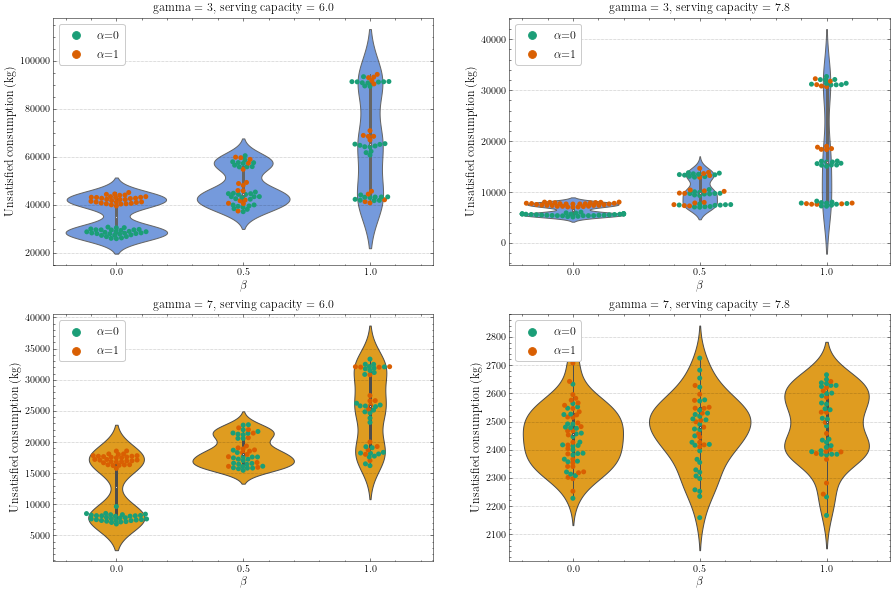

In [6]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

for s in range(len(scs)):
    
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp1[tmp1.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="unsatisfied consumption", data=tmp2,hue='alpha',palette='Dark2')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][g])
        
        ax[g,s].set_title('gamma = %s, serving capacity = %s'%(gammas[g],scs[s]),fontsize=12)
        
        ax[g,s].set_ylabel("Unsatisfied consumption (kg)",fontsize=12);
        ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
        handles, labels = ax[g,s].get_legend_handles_labels()
        ax[g,s].legend(handles[:2], [r"$\alpha$=0",r"$\alpha$=1"],loc='upper left',fontsize=12);
plt.savefig("/home/daan/Desktop/uc_alpha_full.png")

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


REPORT PLOT: Cumulative unsatisfied consumption TWO selected


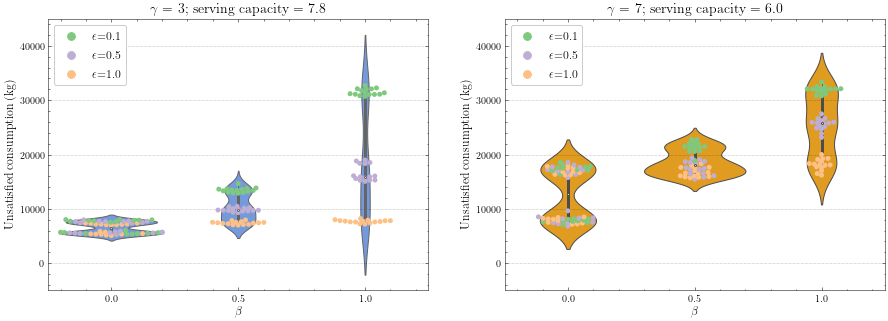

In [7]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

gs = [  [3 , 7.8] ,[7 , 6.0] ]

t={}
t[3]=0
t[7]=1
for i in range(len(gs)):
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="beta", y="unsatisfied consumption", data=tmp2,hue='epsilon',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([-5e3,45e3])
    ax[i].set_ylabel("Unsatisfied consumption (kg)",fontsize=12);
    
    ax[i].set_title(r"$\gamma$ = %s; serving capacity = %s"%(gs[i][0],gs[i][1]),fontsize=14)
    ax[i].set_xlabel(r"$\beta$",fontsize=12)
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:3], [r"$\epsilon$=0.1",r"$\epsilon$=0.5",r"$\epsilon$=1.0"],loc='upper left',fontsize=12)
    
print("REPORT PLOT: Cumulative unsatisfied consumption TWO selected")
plt.savefig("/home/daan/Desktop/uc_epsilon_report.png")

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Cumulative queuing time for busiest facility #5, selected for B=0.0


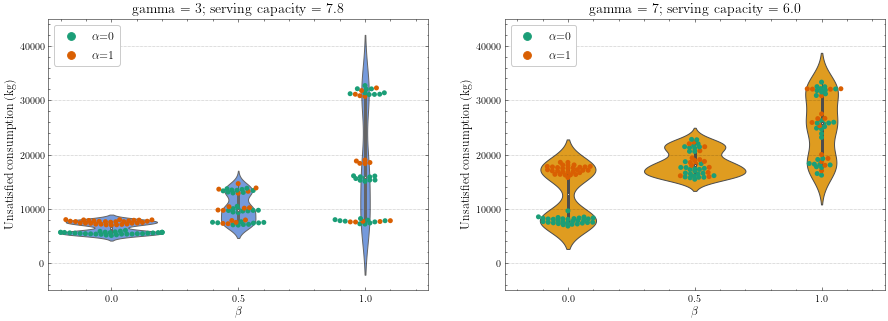

In [8]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

for i in range(len(gs)):
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="beta", y="unsatisfied consumption", data=tmp2,hue='alpha',palette='Dark2')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="beta", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([0,40e3])
    ax[i].set_title("gamma = %s; serving capacity = %s"%(gs[i][0],gs[i][1]),fontsize=14)
    ax[i].set_ylabel("Unsatisfied consumption (kg)",fontsize=12);
    ax[i].set_xlabel(r"$\beta$",fontsize=12)
    
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:2], [r"$\alpha$=0",r"$\alpha$=1"],loc='upper left',fontsize=12)
    ax[i].set_ylim([-5e3,45e3])
print("Cumulative queuing time for busiest facility #5, selected for B=0.0")
plt.savefig("/home/daan/Desktop/uc_alpha_report.png")

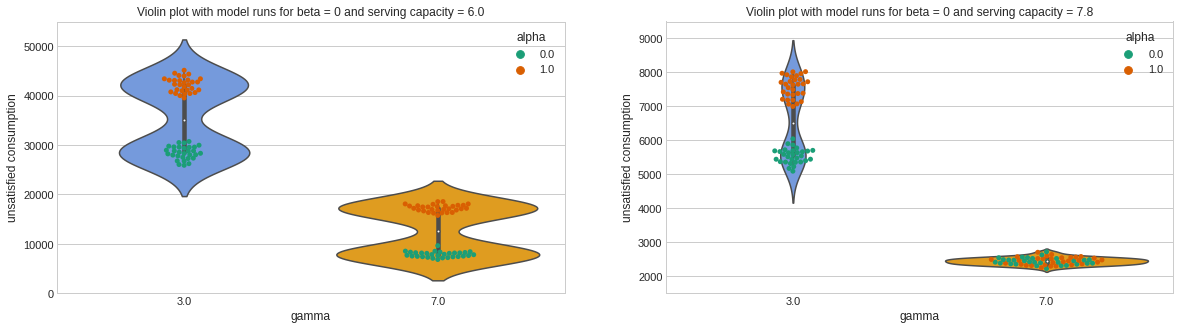

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.beta==0.0]

gammas = [6.0,7.8]
for g in range(len(gammas)):
    
    tmp2 = tmp1[tmp1.parallel_served_full==gammas[g]]
    sns.swarmplot(ax=ax[g] ,x="gamma", y="unsatisfied consumption", data=tmp2,hue='alpha',palette='Dark2')
    sns.violinplot(ax=ax[g], x="gamma", y="unsatisfied consumption", data=tmp2,palette=my_palette['light'])
    ax[g].set_title("Violin plot with model runs for beta = 0 and serving capacity = %s"%gammas[g])
ax[0].set_ylim([0,55000])
ax[1].set_ylim([1500,9500]);

## Food waste

In [22]:
foodwaste = pd.read_feather("test_sample")
fwinput = pd.read_csv("test_input_parameters.csv")

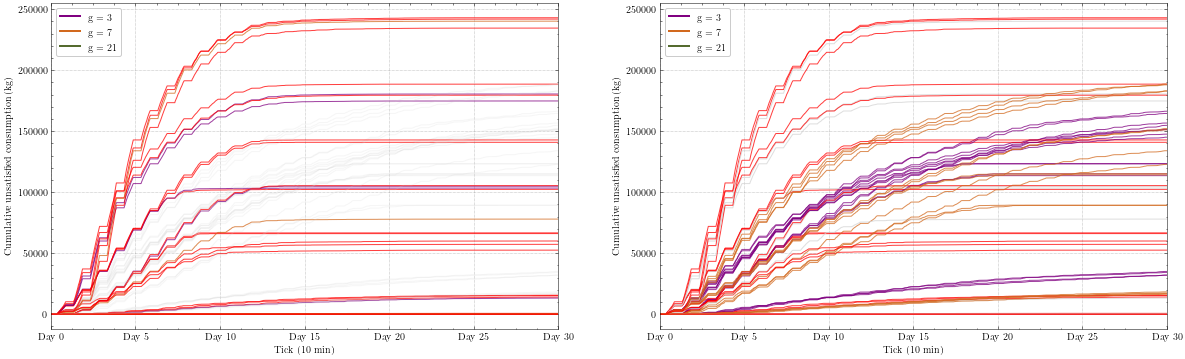

In [26]:
# dict to store relevant indices
d = {}
d[0] = fwinput[fwinput.gamma==3].index
d[1] = fwinput[fwinput.gamma==7].index

fig, ax = plt.subplots(1,2,figsize=(20,6))
           
# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['purple', 'chocolate', 'darkolivegreen']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
labels = ['g = 3', 'g = 7', 'g = 21']

for i in d:    
    
    for a in ax:
        a.set_xlim([0,4320])
        a.set_ylabel("Missed consumption, cum. of households (kg)")
        a.set_xticks(ticks_labels(5)[0])
        a.set_xticklabels(ticks_labels(5)[1])
    
    for j in d[i]:
        if input_vars.parallel_served_full[j] == 6.0:
            ax[0].plot( x, foodwaste.o2[foodwaste.o0==j],color='lightgrey', alpha=0.2)
            ax[1].plot( x, foodwaste.o2[foodwaste.o0==j],color=colors[i], alpha=.75)
            
        else:
            if input_vars.epsilon[j] < 1.0:
                ax[0].plot( x, foodwaste.o2[foodwaste.o0==j],color='red', alpha=.75)
                ax[1].plot( x, foodwaste.o2[foodwaste.o0==j],color='red', alpha=.75)
            else:
                ax[0].plot( x, foodwaste.o2[foodwaste.o0==j],color=colors[i], alpha=.75)
                ax[1].plot( x, foodwaste.o2[foodwaste.o0==j],color='lightgrey', alpha=.75)
        
for a in ax:
    a.set_ylabel("Cumulative unsatisfied consumption (kg)")
    a.set_xlabel("Tick (10 min)")
    a.set_xlim([0,4320])
    a.legend(lines, labels)

# plt.savefig("/home/daan/Desktop/unsatisfied_consumption.png")

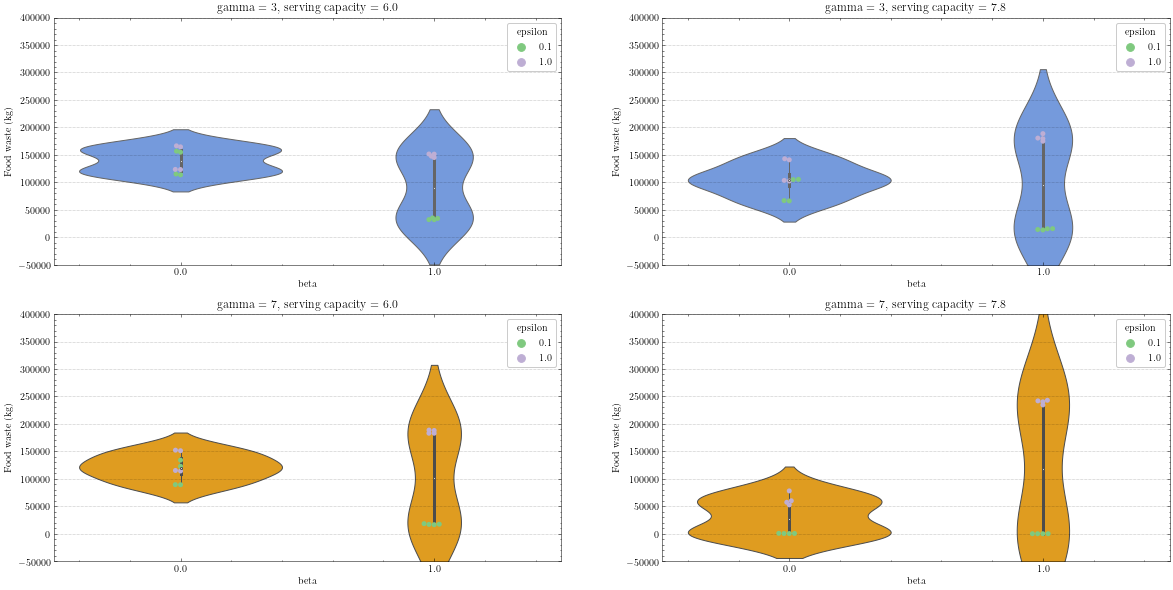

In [29]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

uc_endvals_dict = {}
uc_endvals_dict["Food waste (kg)"] = list()
# filtered_input_vars = input_vars[input_vars.gamma==7].reset_index()#.iloc[ d[0] ].reset_index()
for j in fwinput.index:
    uc_endvals_dict["Food waste (kg)"].append(foodwaste.o2[foodwaste.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([fwinput,uc_endvals_df],axis=1)

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="Food waste (kg)", data=tmp2,hue='epsilon',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="beta", y="Food waste (kg)", data=tmp2,color=my_palette['light'][g])
        
        ax[g,s].set_title('gamma = %s, serving capacity = %s'%(gammas[g],scs[s]))
        ax[g,s].set_ylim([-50e3,400e3])


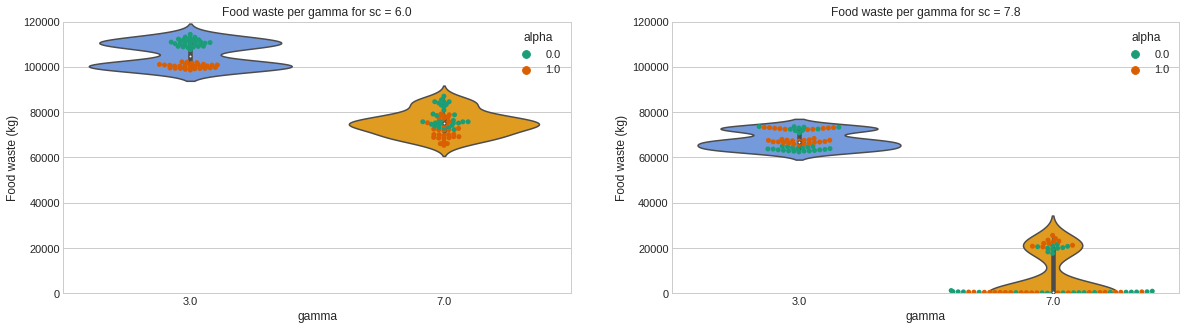

In [36]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

tmp = input_vars_batch_filtered[input_vars_batch_filtered.beta==0.0]

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [6.0,7.8]
filterfor = ['alpha','epsilon']
for g in range(len(gammas)):
    tmp2 = tmp[tmp.parallel_served_full==gammas[g]]

    sns.swarmplot(ax=ax[g] ,x="gamma", y="Food waste (kg)", data=tmp2,hue='alpha',palette='Dark2')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[g], x="gamma", y="Food waste (kg)", data=tmp2,palette=my_palette['light'])

    ax[g].set_ylim([0,12e4])
    ax[g].set_title("Food waste per gamma for sc = %s"%gammas[g])

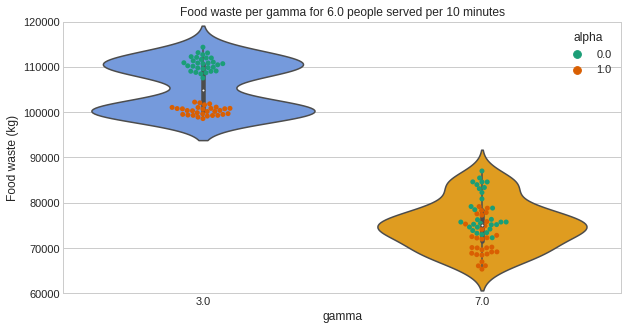

In [37]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

tmp2 = tmp[tmp.beta==0.0]

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [6.0,7.8]
filterfor = ['alpha','epsilon']
tmp2 = tmp2[tmp2.parallel_served_full==gammas[0]]

sns.swarmplot(ax=ax ,x="gamma", y="Food waste (kg)", data=tmp2,hue=filterfor[0],palette='Dark2')#palette=my_palette['dark'])
sns.violinplot(ax=ax, x="gamma", y="Food waste (kg)", data=tmp2,palette=my_palette['light'])

ax.set_ylim([6e4,12e4])
ax.set_title("Food waste per gamma for %s people served per 10 minutes"%gammas[0]);

## Queuing

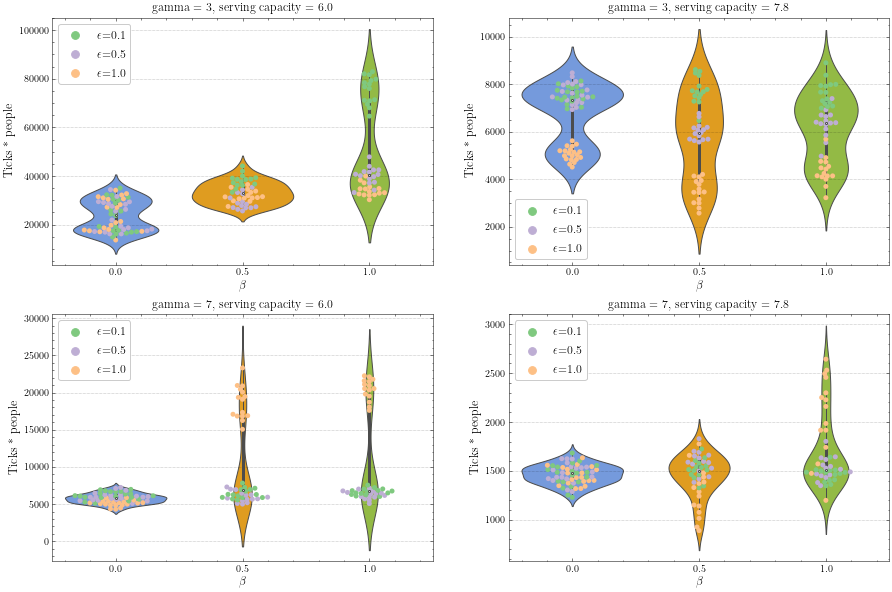

In [9]:
plt.style.use(["science","grid"])

fig, ax = plt.subplots(2,2,figsize=(15,10))
uc_endvals_dict = {}
uc_endvals_dict["ticks*people"] = list()

for j in input_vars_batch.index:
    uc_endvals_dict["ticks*people"].append( np.sum(data_batch[data_batch.o0==j].iloc[:,9]))

uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([input_vars_batch,uc_endvals_df],axis=1)


my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="ticks*people", data=tmp2,hue='epsilon',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="beta", y="ticks*people", data=tmp2,palette=my_palette['light'])
        
        ax[g,s].set_title('gamma = %s, serving capacity = %s'%(gammas[g],scs[s]),fontsize=12)
        
        ax[g,s].set_ylabel("Ticks * people",fontsize=12);
        ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
        handles, labels = ax[g,s].get_legend_handles_labels()
        ax[g,s].legend(handles[:3], [r"$\epsilon$=0.1",r"$\epsilon$=0.5",r"$\epsilon$=1.0"],loc='upper left',fontsize=12)
handles, labels = ax[0,1].get_legend_handles_labels()
ax[0,1].legend(handles[:3], [r"$\epsilon$=0.1",r"$\epsilon$=0.5",r"$\epsilon$=1.0"],loc='lower left',fontsize=12);

plt.savefig("/home/daan/Desktop/queuing_onefac_epsilon_full.png")

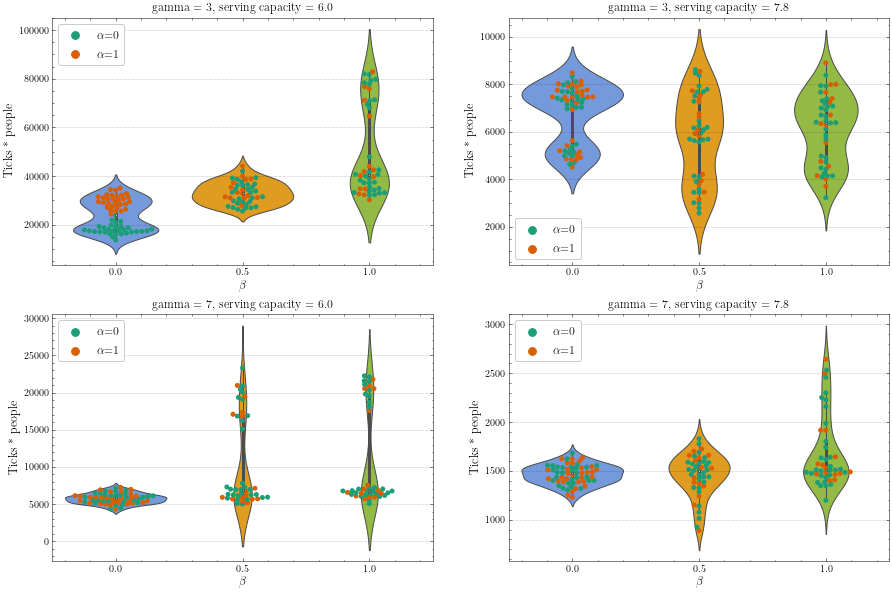

In [10]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

for s in range(len(scs)):
    
    tmp = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="ticks*people", data=tmp2,hue='alpha',palette='Dark2')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="beta", y="ticks*people", data=tmp2,palette=my_palette['light'])
        
        ax[g,s].set_title('gamma = %s, serving capacity = %s'%(gammas[g],scs[s]),fontsize=12)
        
        ax[g,s].set_ylabel("Ticks * people",fontsize=12)
        ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
        handles, labels = ax[g,s].get_legend_handles_labels()
        ax[g,s].legend(handles[:2], [r"$\alpha$=0",r"$\alpha$=1"],loc='upper left',fontsize=12)
handles, labels = ax[0,1].get_legend_handles_labels()        
ax[0,1].legend(handles[:3], [r"$\alpha$=0",r"$\alpha$=1"],loc='lower left',fontsize=12);
plt.savefig("/home/daan/Desktop/queuing_onefac_alpha_full.png")

REPORT PLOT: Cumulative queuing time for busiest facility #5, TWO selected


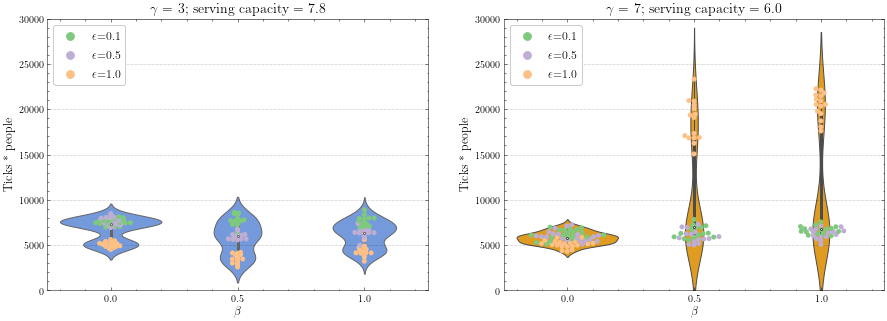

In [11]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

gs = [  [3 , 7.8] ,[7 , 6.0] ]

t={}
t[3]=0
t[7]=1
for i in range(len(gs)):
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="beta", y="ticks*people", data=tmp2,hue='epsilon',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="beta", y="ticks*people", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([0,30e3])
    ax[i].set_title(r"$\gamma$ = %s; serving capacity = %s"%(gs[i][0],gs[i][1]),fontsize=14)
    ax[i].set_ylabel("Ticks * people",fontsize=12)
    ax[i].set_xlabel(r"$\beta$",fontsize=12)
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:3], [r"$\epsilon$=0.1",r"$\epsilon$=0.5",r"$\epsilon$=1.0"],loc='upper left',fontsize=12)
print("REPORT PLOT: Cumulative queuing time for busiest facility #5, TWO selected")
plt.savefig("/home/daan/Desktop/queuing_onefac_epsilon_report.png")

## Queuing 2 

In [12]:
q_sum = list()
n_facs = 12
for j in input_vars_batch.index:
    tmp_sum = 0
    for i in range(n_facs):
        tmp_sum += ( np.sum(data_batch[data_batch.o0==j].iloc[:,i+4]))  
    
    q_sum.append(tmp_sum)    

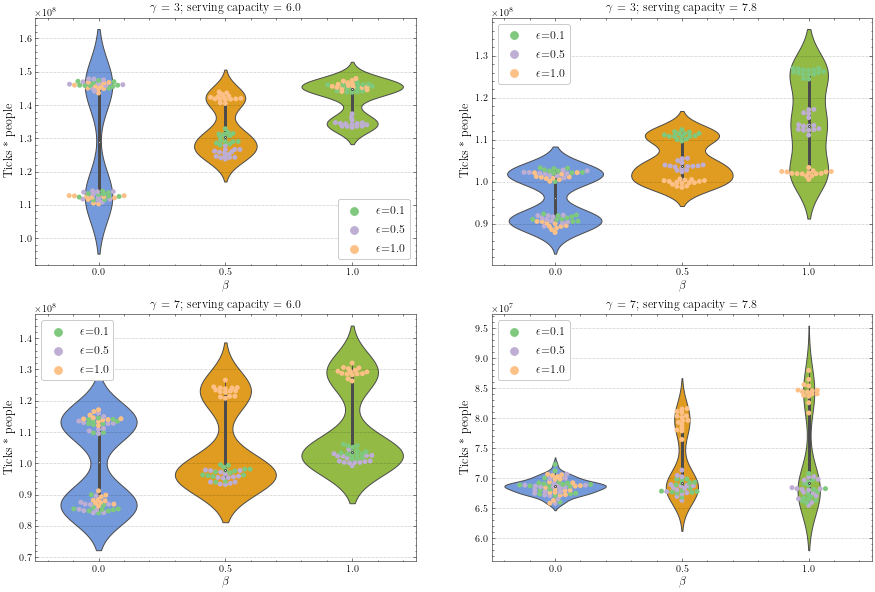

In [13]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

uc_endvals_dict = {}
uc_endvals_dict["ticks*people"] = list()

for j in input_vars_batch.index:   
    uc_endvals_dict["ticks*people"].append( q_sum[j] )

uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_batch_filtered = pd.concat([input_vars_batch,uc_endvals_df],axis=1)

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']

gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):
    
    tmp = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="ticks*people", data=tmp2,hue='epsilon',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="beta", y="ticks*people", data=tmp2,palette=my_palette['light'])
        ax[g,s].set_title(r"$\gamma$ = %s; serving capacity = %s"%(gammas[g],scs[s]),fontsize=12)
        ax[g,s].set_ylabel("Ticks * people",fontsize=12)
        ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
        handles, labels = ax[g,s].get_legend_handles_labels()
        ax[g,s].legend(handles[:3], [r"$\epsilon$=0.1",r"$\epsilon$=0.5",r"$\epsilon$=1.0"],loc='upper left',fontsize=12)
handles, labels = ax[0,0].get_legend_handles_labels()
ax[0,0].legend(handles[:3], [r"$\epsilon$=0.1",r"$\epsilon$=0.5",r"$\epsilon$=1.0"],loc='lower right',fontsize=12);
plt.savefig("/home/daan/Desktop/queuing_allfacs_epsilon_full.png")

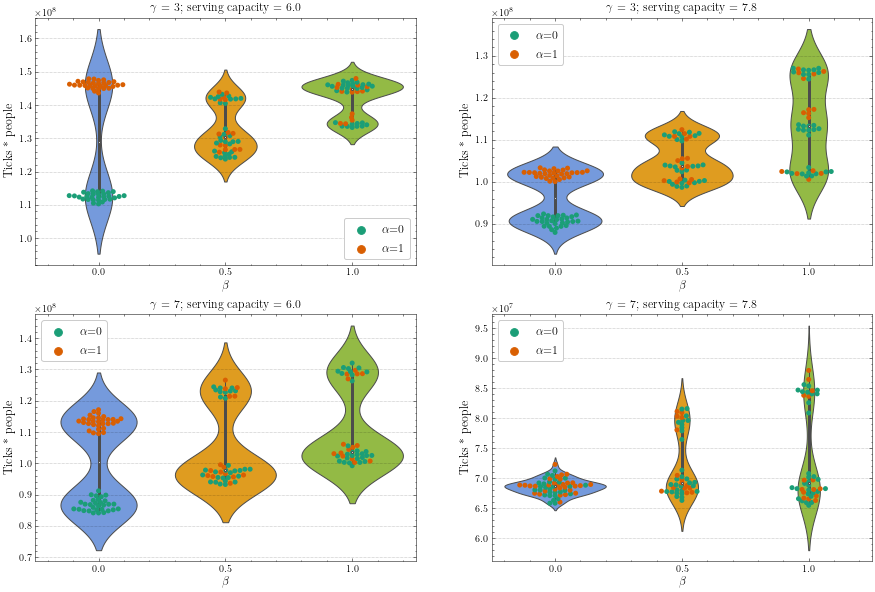

In [14]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

for s in range(len(scs)):    
    tmp = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==scs[s]]
    for g in range(len(gammas)):
        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="beta", y="ticks*people", data=tmp2,hue='alpha',palette='Dark2')
        sns.violinplot(ax=ax[g,s], x="beta", y="ticks*people", data=tmp2,palette=my_palette['light'])
        
        ax[g,s].set_title(r"$\gamma$ = %s; serving capacity = %s"%(gammas[g],scs[s]),fontsize=12)
        ax[g,s].set_ylabel("Ticks * people",fontsize=12);
        ax[g,s].set_xlabel(r"$\beta$",fontsize=12)
        handles, labels = ax[g,s].get_legend_handles_labels()
        ax[g,s].legend(handles[:2], [r"$\alpha$=0",r"$\alpha$=1"],loc='upper left',fontsize=12)
handles, labels = ax[0,0].get_legend_handles_labels()
ax[0,0].legend(handles[:3], [r"$\alpha$=0",r"$\alpha$=1"],loc='lower right',fontsize=12);
plt.savefig("/home/daan/Desktop/queuing_allfacs_alpha_full.png")

REPORT PLOT: Cumulative queuing of all facilities summed


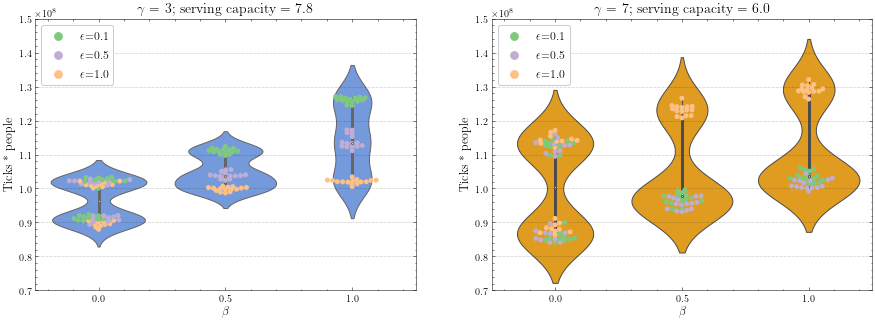

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

gs = [  [3 , 7.8] ,[7 , 6.0] ]

t={}
t[3]=0
t[7]=1
for i in range(len(gs)):
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]
    sns.swarmplot(ax=ax[i] ,x="beta", y="ticks*people", data=tmp2,hue='epsilon',palette='Accent')
    sns.violinplot(ax=ax[i], x="beta", y="ticks*people", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([0.7e8,1.5e8])
    ax[i].set_title(r"$\gamma$ = %s; serving capacity = %s"%(gs[i][0],gs[i][1]),fontsize=14)
    ax[i].set_ylabel("Ticks * people",fontsize=12);
    ax[i].set_xlabel(r"$\beta$",fontsize=12)
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:3], [r"$\epsilon$=0.1",r"$\epsilon$=0.5",r"$\epsilon$=1.0"],loc='upper left',fontsize=12)
print("REPORT PLOT: Cumulative queuing of all facilities summed")
plt.savefig("/home/daan/Desktop/queuing_allfacs_epsilon_report.png")

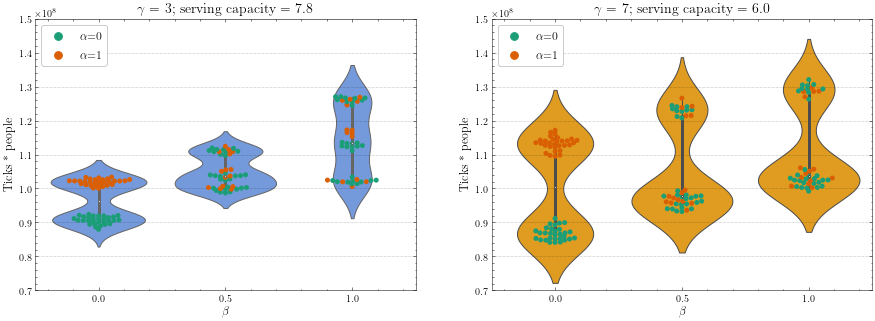

In [16]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

for i in range(len(gs)):
    tmp1 = input_vars_batch_filtered[input_vars_batch_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]
    sns.swarmplot(ax=ax[i] ,x="beta", y="ticks*people", data=tmp2,hue='alpha',palette='Dark2')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="beta", y="ticks*people", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([0.7e8,1.5e8])
    ax[i].set_title(r"$\gamma$ = %s; serving capacity = %s"%(gs[i][0],gs[i][1]),fontsize=14)
    ax[i].set_ylabel("Ticks * people",fontsize=12)
    ax[i].set_xlabel(r"$\beta$",fontsize=12)
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:2], [r"$\alpha$=0",r"$\alpha$=1"],loc='upper left',fontsize=12)
plt.savefig("/home/daan/Desktop/queuing_allfacs_alpha_report.png")